# Best vs second-best

In [1]:
import binance_helpers as bh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import model as m
import ui
import importlib
import time
from datetime import datetime, timedelta
client = bh.new_binance_client()
importlib.reload(m)

<module 'model' from '/Users/SunnyNie/Documents/Investing/metagame/model.py'>

In [2]:
from downloader import Downloader
dl = Downloader()
btc = dl.get_timeseries_data("BTCUSDT")
btc = btc.reindex(trades.index)

NameError: name 'trades' is not defined

In [181]:
btc['ma'] = btc.close.rolling(24).mean()

In [182]:
trades = pd.read_csv("data/trades.csv", index_col=0, parse_dates=True)
trades = trades.iloc[-5000:]
trades2 = pd.read_csv("data/trades2.csv", index_col=0, parse_dates=True)
trades2 = trades2.iloc[-5000:]

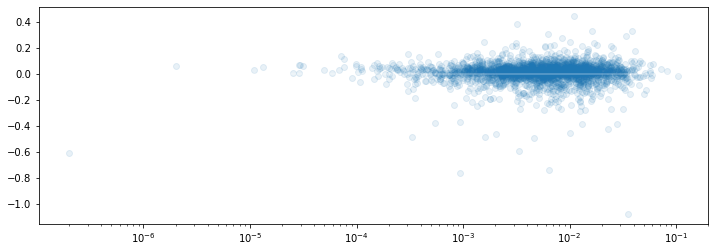

In [424]:
fig, ax = plt.subplots(figsize=(12,4))
# ax.scatter(trades.pret, trades.target, alpha=0.1)

# ax.scatter(trades.pret-trades2.pret, trades.target, alpha=0.1)
ax.scatter(btc.close.diff()/btc.close, trades.target, alpha=0.1)
# ax.scatter(btc.ma.diff()/btc.ma, trades.target, alpha=0.1)


ax.set_xscale('log')
ax.axhline(0,c="white", alpha=0.3)

In [187]:
trades['btc'] = btc.ma.diff()/btc.ma
trades['anal'] = trades.pret-trades2.pret

In [419]:
# t = trades2[trades.anal<0.1]
# t = trades2[trades2.pret>0.05]
t = trades[(trades.anal>0.2) & (trades.pret>0.3)]


len(t)

202

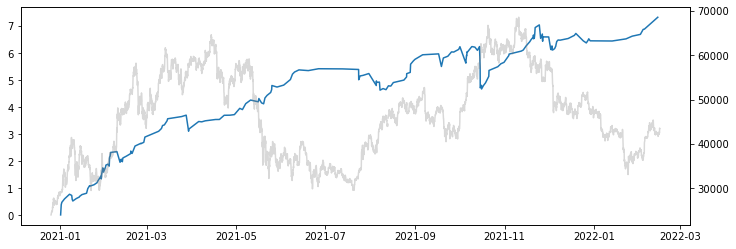

In [420]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(t.target.cumsum())
ax1 = ax.twinx()
ax1.plot(btc.close, alpha=0.3, color="gray")

In [421]:
print(f"mean: {round(100*trades.target.mean(), 2)}%, median: {round(100*trades.target.median(), 2)}%, winrate: {round(100*len(trades[trades.target>0].target)/len(trades), 2)}%")


mean: 1.04%, median: 1.81%, winrate: 65.3%


In [422]:
print(f"mean: {round(100*t.target.mean(), 2)}%, median: {round(100*t.target.median(), 2)}%, winrate: {round(100*len(t[t.target>0].target)/len(t), 2)}%, length: {len(t)}")

mean: 3.62%, median: 6.39%, winrate: 73.76%, length: 202


In [ ]:
print(f"mean: {round(100*t.target.mean(), 2)}%, median: {round(100*t.target.median(), 2)}%, winrate: {round(100*len(t[t.target>0].target)/len(t), 2)}%, length: {len(t)}")